## Import libraries

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize

import scipy.cluster.hierarchy as shc

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss

from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [35]:
data = pd.read_csv('ML_Project_data.csv')
modelData = data.drop(['label'], axis=1)
labels = data['label']

In [36]:
data.sample(n=5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f60,f61,f62,f63,f64,f65,f66,f67,f68,label
4710,88191,2735.590516,205493.1480,5711.057133,1.127761e+06,0.332884,0.413978,0.306309,0.457731,0.318386,...,60.617756,46.782078,55.462086,49.677887,39.311531,38.796692,42.473606,38.756374,39.476429,1
10407,87860,2878.920663,290295.7266,6092.454826,1.198869e+06,0.220314,0.249701,0.400222,0.312943,0.531078,...,68.645561,88.746216,67.703003,61.458874,75.024498,69.949928,77.711037,80.714333,126.083107,4
6716,89611,2832.788390,849805.1446,5981.480497,2.491899e+06,0.397320,0.301977,0.498761,0.425237,0.207440,...,84.415504,59.736752,83.095253,69.194260,48.553337,53.077389,51.408463,47.567596,79.228539,2
326,129489,3197.852430,236779.6748,6408.194584,5.906822e+05,0.444583,0.404323,0.392631,0.371602,0.452789,...,80.655640,70.033463,91.528915,65.181450,72.857300,68.044167,76.253075,63.906807,134.757660,0
2314,100269,2757.664710,301362.2994,5959.980627,8.864881e+05,0.277739,0.321861,0.473990,0.495933,0.597967,...,70.380203,54.794155,48.231483,59.453911,47.974365,38.566723,49.718597,70.830276,52.456680,0


## Data Normalization

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(modelData)
modelData_scaled = scaler.transform(modelData)

In [38]:
pd.concat([pd.DataFrame(modelData_scaled), labels], axis=1).sample(n=5)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,label
1798,0.276517,0.491690,0.096484,0.669311,0.109886,0.259546,0.219901,0.265585,0.394037,0.318401,...,0.114109,0.109921,0.141366,0.094607,0.160881,0.075514,0.094319,0.083526,0.185056,0
8231,0.316442,0.537036,0.354929,0.673425,0.274790,0.703290,0.493119,0.431580,0.380109,0.396719,...,0.155184,0.089495,0.168392,0.127533,0.094582,0.077410,0.060683,0.068158,0.106952,3
5509,0.254443,0.368984,0.350453,0.449949,0.375661,0.191690,0.307691,0.275375,0.432937,0.264305,...,0.065793,0.040994,0.036944,0.056227,0.050705,0.075249,0.109416,0.061545,0.094089,2
1665,0.368799,0.563075,0.150143,0.672924,0.172755,0.603566,0.524089,0.693137,0.465763,0.388934,...,0.087799,0.060319,0.084824,0.050963,0.027194,0.033785,0.028158,0.055130,0.042921,0
3402,0.157449,0.233064,0.038211,0.269756,0.057347,0.383860,0.165143,0.142548,0.078045,0.138757,...,0.065538,0.027733,0.055470,0.057295,0.033495,0.040531,0.035610,0.037421,0.042005,1


## Features Selection

In [39]:
data.corr().sample(n=5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f60,f61,f62,f63,f64,f65,f66,f67,f68,label
f65,0.021948,-0.065246,-0.000571,-0.131971,0.017111,-0.221510,-0.238824,-0.215850,-0.188895,-0.131188,...,0.488392,0.554746,0.613382,0.674763,0.779231,1.000000,0.788892,0.657977,0.565096,0.005227
f58,-0.057363,-0.067362,0.175110,-0.080524,0.177137,-0.080030,-0.069983,-0.066445,-0.033953,-0.057506,...,0.582815,0.555936,0.509971,0.423429,0.361593,0.355301,0.310409,0.329624,0.342647,-0.042850
f20,-0.014651,-0.006215,0.066500,-0.004373,0.039209,-0.080859,0.102574,0.006602,0.652443,-0.101997,...,0.063532,0.040562,0.005658,0.004053,0.007841,-0.014684,0.039689,0.056916,0.075549,0.070595
f42,0.148930,0.271169,0.110282,0.293202,0.061979,0.325655,0.242169,0.144765,0.105987,0.081936,...,0.082181,0.091303,0.128421,0.158061,0.098076,0.007480,-0.052973,-0.145493,-0.207338,-0.074216
f32,0.016674,-0.113782,-0.145599,-0.129720,-0.191805,0.103361,0.062053,0.087142,0.043098,0.045576,...,-0.028008,-0.032266,-0.037649,-0.031447,-0.042148,-0.050465,-0.076629,-0.071055,-0.063937,-0.006073


In [40]:
display(data.corr()['label'])

f0      -0.096589
f1      -0.095564
f2       0.135957
f3      -0.118736
f4       0.146644
           ...   
f65      0.005227
f66      0.054075
f67      0.082596
f68      0.096932
label    1.000000
Name: label, Length: 70, dtype: float64

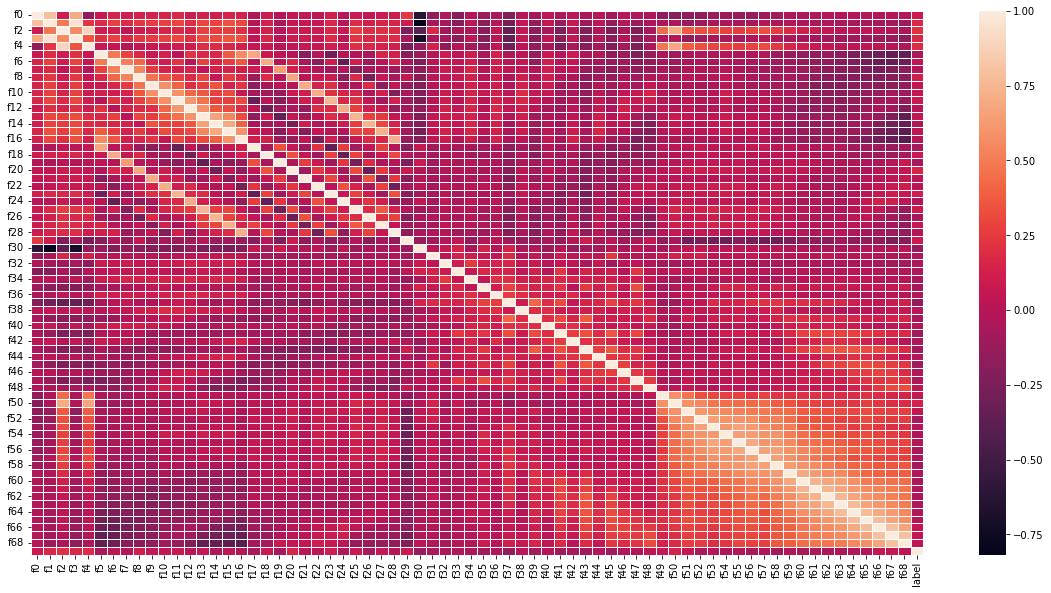

In [41]:
plt.figure(figsize = (20, 10))

data_log = data.copy()
data_log = np.log10(data_log)
data_heatmap = sns.heatmap(data_log.corr(), linewidths = 0.5)

plt.show()

In [42]:
print("Selected Features with correlation between features: \n")
data_log_corr = data_log.corr()['label'].sort_values(ascending = False)[1:51]
print(np.array(data_log_corr.index))

Selected Features with correlation between features: 

['f2' 'f4' 'f3' 'f1' 'f20' 'f50' 'f8' 'f23' 'f25' 'f0' 'f29' 'f11' 'f18'
 'f51' 'f66' 'f13' 'f49' 'f27' 'f10' 'f67' 'f9' 'f15' 'f6' 'f48' 'f68'
 'f21' 'f22' 'f53' 'f12' 'f38' 'f7' 'f65' 'f28' 'f40' 'f44' 'f36' 'f47'
 'f55' 'f16' 'f64' 'f14' 'f61' 'f33' 'f46' 'f31' 'f24' 'f59' 'f57' 'f32'
 'f54']


In [43]:
features = list(modelData.columns)
selectModel = SelectKBest(chi2, k=50)
selectModel.fit(modelData_scaled, labels)
selected_features = selectModel.get_feature_names_out(features)

In [44]:
print("Selected Features with feature selsection algorithm: \n")
display(selected_features)

Selected Features with feature selsection algorithm: 



array(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f33', 'f34', 'f37', 'f40', 'f41', 'f42', 'f44', 'f46',
       'f50', 'f52', 'f56', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65',
       'f66', 'f67', 'f68'], dtype=object)

In [45]:
print("Features that are in feature selsection algorithm and not in correlation selsection: \n")
print(list(set(selected_features) - set(data_log_corr.index)))

Features that are in feature selsection algorithm and not in correlation selsection: 

['f56', 'f17', 'f37', 'f30', 'f19', 'f41', 'f62', 'f42', 'f5', 'f34', 'f63', 'f52', 'f60', 'f26']


In [46]:
deleted_cols = dict()
selected_cols = []

for i in range(len(selected_features)):
    col = int(selected_features[i][1:])
    deleted_cols[col] = 0

for i in range(len(modelData.columns)):
    if i not in deleted_cols:
        selected_cols.append(i)

data_model_scaled = np.delete(modelData_scaled, selected_cols, 1)

## Train Test Splitting

In [47]:
trainData, testData, trainLabels, testLabels = train_test_split(data_model_scaled, labels, test_size=0.2,  random_state=42)                                                    

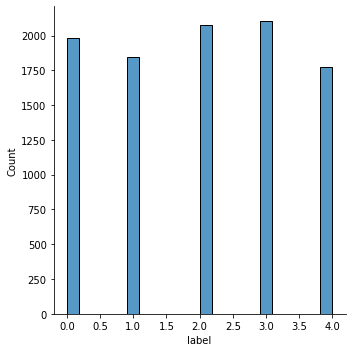

In [48]:
sns.displot(trainLabels, kde=False)

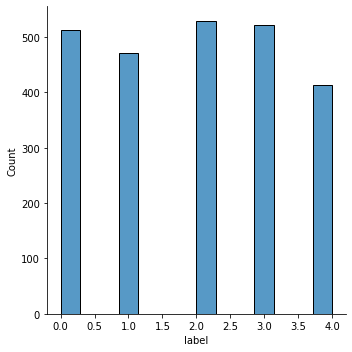

In [49]:
sns.displot(testLabels, kde=False)

In [50]:
print("Train Data Size: ", len(trainData))
print("Test Data Size: ", len(testData))

Train Data Size:  9792
Test Data Size:  2448


## Reduce The Dimensionality With PCA

In [55]:
pca_2 = PCA(n_components = 2)

trainData_principal_2 = pd.DataFrame(pca_2.fit_transform(trainData, trainLabels), columns = ['P1', 'P2'])
trainLabels_principal_2 = pd.DataFrame(trainLabels).sort_index(ignore_index=True)
trainData_principal_2 = pd.concat([trainData_principal_2, trainLabels_principal_2], axis=1)


testData_principal_2 = pd.DataFrame(pca_2.fit_transform(testData, testLabels), columns = ['P1', 'P2'])
testLabels_principal_2 = pd.DataFrame(testLabels).sort_index(ignore_index=True)
testData_principal_2 = pd.concat([testData_principal_2, testLabels_principal_2], axis=1)

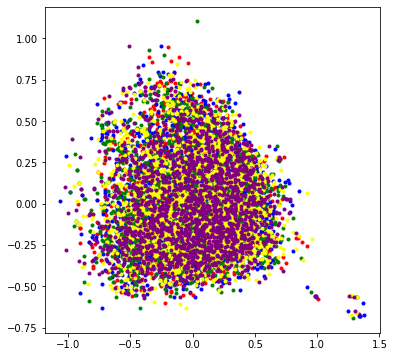

In [56]:
dataClass0 = trainData_principal_2.loc[trainData_principal_2['label']==0]
dataClass1 = trainData_principal_2.loc[trainData_principal_2['label']==1]
dataClass2 = trainData_principal_2.loc[trainData_principal_2['label']==2]
dataClass3 = trainData_principal_2.loc[trainData_principal_2['label']==3]
dataClass4 = trainData_principal_2.loc[trainData_principal_2['label']==4]

plt.figure(figsize = (6, 6)) 

plt.scatter(dataClass0['P1'], dataClass0['P2'], c='red', marker='.')
plt.scatter(dataClass1['P1'], dataClass1['P2'], c='blue', marker='.')
plt.scatter(dataClass2['P1'], dataClass2['P2'], c='green', marker='.')
plt.scatter(dataClass3['P1'], dataClass3['P2'], c='yellow', marker='.')
plt.scatter(dataClass4['P1'], dataClass4['P2'], c='purple', marker='.')

plt.show() 

Dendrogram for TrainData: 



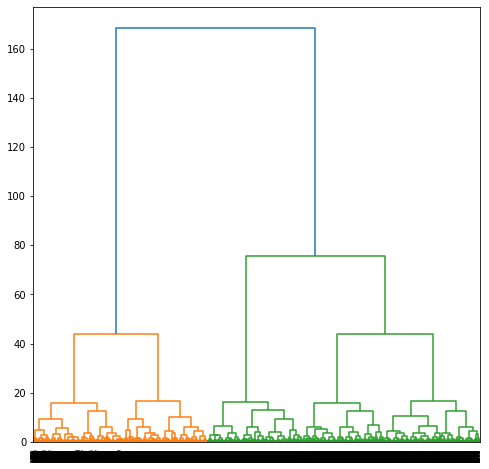

In [20]:
print("Dendrogram for TrainData: \n")
plt.figure(figsize =(8, 8))
trainDendrogram = shc.dendrogram((shc.linkage(trainData_principal_2, method ='ward')))

Dendrogram for TestData: 



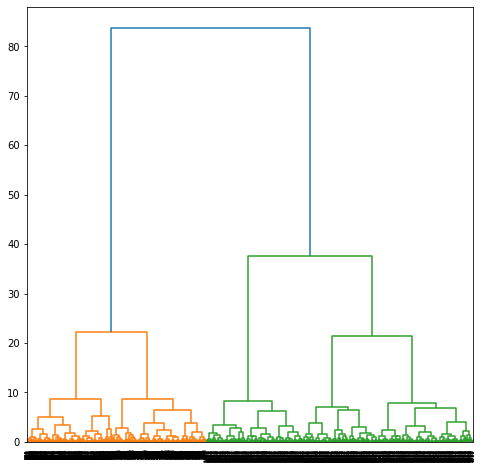

In [21]:
print("Dendrogram for TestData: \n")
plt.figure(figsize =(8, 8))
testDendrogram = shc.dendrogram((shc.linkage(testData_principal_2, method ='ward')))

# Classifying

In [24]:
def print_report(model):
    print("TrainData: ")
    print(classification_report(trainLabels, model.predict(trainData)))
    print()
    print("TestData: ")
    print(classification_report(testLabels, model.predict(testData)))

In [25]:
def visualize_roc_curve(model, data_in, labels_in, n_classes):
    Y_true = label_binarize(labels_in, classes=[int(i) for i in range(n_classes)])
    Y_score = label_binarize(model.predict(data_in), classes=[int(i) for i in range(n_classes)])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ =  roc_curve(Y_true[:, i], Y_score[:, i])
        roc_auc[i] =  auc(fpr[i], tpr[i])

    plt.figure()

    colors = ['red', 'blue', 'green', 'yellow', 'purple']

    for i in range(n_classes):    
        temp_label = 'ROC of class {0} (area={1:0.2f})'.format(i, roc_auc[i])
        plt.plot(fpr[i], tpr[i], label=temp_label, color=colors[i])

        plt.plot([0, 1], [0, 1], linestyle='--', color='black')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
    plt.show()

## KNN classifier

In [24]:
KNN = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='manhattan', algorithm='ball_tree')
KNN.fit(trainData, trainLabels)

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=2,
                     weights='distance')

In [25]:
print("KNN Classifier Train accuracy: ", KNN.score(trainData, trainLabels)*100)
print("KNN Classifier Test accuracy: ", KNN.score(testData, testLabels)*100)

KNN Classifier Train accuracy:  100.0
KNN Classifier Test accuracy:  90.890522875817


In [26]:
print("KNN classification report: \n")
print_report(KNN)

KNN classification report: 

TrainData: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       1.00      1.00      1.00      1849
           2       1.00      1.00      1.00      2077
           3       1.00      1.00      1.00      2104
           4       1.00      1.00      1.00      1777

    accuracy                           1.00      9792
   macro avg       1.00      1.00      1.00      9792
weighted avg       1.00      1.00      1.00      9792


TestData: 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       512
           1       0.91      0.91      0.91       472
           2       0.90      0.91      0.91       529
           3       0.93      0.89      0.91       521
           4       0.87      0.91      0.89       414

    accuracy                           0.91      2448
   macro avg       0.91      0.91      0.91      2448
weighted avg       0.91 

KNN Classifier: ROC curve of train


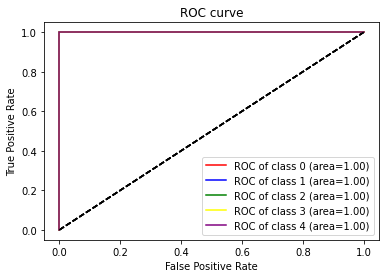

In [27]:
print("KNN Classifier: ROC curve of train")
visualize_roc_curve(KNN, trainData, trainLabels, n_classes=5)

KNN Classifier: ROC curve of test


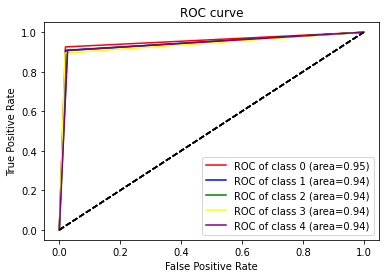

In [28]:
print("KNN Classifier: ROC curve of test")
visualize_roc_curve(KNN, testData, testLabels, n_classes=5)

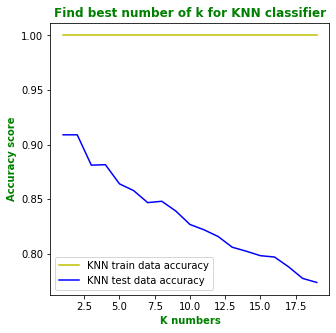

In [29]:
train_knn_accuracy = list()
test_knn_accuracy = list()

for i in range(1, 20):
    temp_KNN = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan', algorithm='ball_tree')
    temp_KNN.fit(trainData, trainLabels)
    train_knn_accuracy.append(temp_KNN.score(trainData, trainLabels))
    test_knn_accuracy.append(temp_KNN.score(testData, testLabels))
    
plt.figure(figsize = (5, 5)) 
plt.plot([int(i) for i in range(1, 20)], train_knn_accuracy, color="y", label="KNN train data accuracy")
plt.plot([int(i) for i in range(1, 20)], test_knn_accuracy, color="b", label="KNN test data accuracy")

plt.title("Find best number of k for KNN classifier", color = 'green', fontweight = 'bold') 
plt.xlabel("K numbers", color = 'green', fontweight = 'bold') 
plt.ylabel("Accuracy score", color = 'green', fontweight = 'bold')

plt.legend(loc="best")
plt.show()

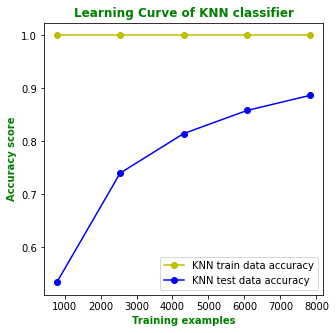

In [30]:
knn_train_sizes, knn_train_accuracy, knn_testt_accuracy = learning_curve(KNN, trainData, trainLabels, scoring="accuracy")

plt.figure(figsize = (5, 5)) 
plt.plot(knn_train_sizes, knn_train_accuracy.mean(1), "o-", color="y", label="KNN train data accuracy")
plt.plot(knn_train_sizes, knn_testt_accuracy.mean(1), "o-", color="b", label="KNN test data accuracy")

plt.title("Learning Curve of KNN classifier", color = 'green', fontweight = 'bold') 
plt.xlabel("Training examples", color = 'green', fontweight = 'bold') 
plt.ylabel("Accuracy score", color = 'green', fontweight = 'bold')

plt.legend(loc="best")
plt.show()

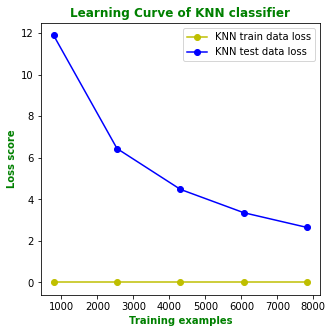

In [31]:
knn_train_sizes, knn_train_loss, knn_test_loss = learning_curve(KNN, trainData, trainLabels, scoring="neg_log_loss")

plt.figure(figsize = (5, 5)) 
plt.plot(knn_train_sizes, -knn_train_loss.mean(1), "o-", color="y", label="KNN train data loss")
plt.plot(knn_train_sizes, -knn_test_loss.mean(1), "o-", color="b", label="KNN test data loss")

plt.title("Learning Curve of KNN classifier", color = 'green', fontweight = 'bold') 
plt.xlabel("Training examples", color = 'green', fontweight = 'bold') 
plt.ylabel("Loss score", color = 'green', fontweight = 'bold')

plt.legend(loc="best")
plt.show()

## SVM classifier

In [62]:
svm = SVC(kernel='rbf', C=2, gamma=8, decision_function_shape='ovo', random_state=42)
svm.fit(trainData, trainLabels)

SVC(C=2, decision_function_shape='ovo', gamma=8, random_state=42)

In [63]:
print("SVM Classifier Train accuracy: ", svm.score(trainData, trainLabels)*100)
print("SVM Classifier Test accuracy: ", svm.score(testData, testLabels)*100)

SVM Classifier Train accuracy:  99.98978758169935
SVM Classifier Test accuracy:  87.13235294117648


In [64]:
print("SVM classification report: \n")
print_report(svm)

SVM classification report: 

TrainData: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       1.00      1.00      1.00      1849
           2       1.00      1.00      1.00      2077
           3       1.00      1.00      1.00      2104
           4       1.00      1.00      1.00      1777

    accuracy                           1.00      9792
   macro avg       1.00      1.00      1.00      9792
weighted avg       1.00      1.00      1.00      9792


TestData: 
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       512
           1       0.94      0.83      0.88       472
           2       0.90      0.88      0.89       529
           3       0.73      0.91      0.81       521
           4       0.91      0.85      0.88       414

    accuracy                           0.87      2448
   macro avg       0.88      0.87      0.87      2448
weighted avg       0.88 

SVM Classifier: ROC curve of train


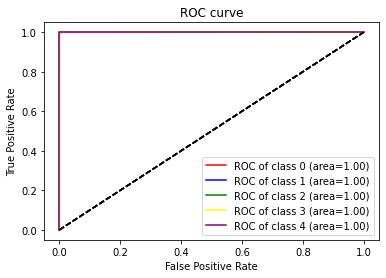

In [65]:
print("SVM Classifier: ROC curve of train")
visualize_roc_curve(svm, trainData, trainLabels, n_classes=5)

SVM Classifier: ROC curve of test


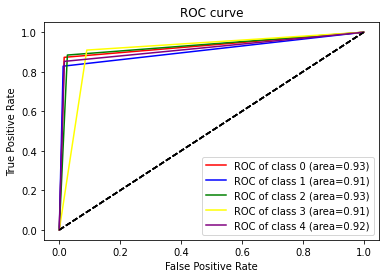

In [66]:
print("SVM Classifier: ROC curve of test")
visualize_roc_curve(svm, testData, testLabels, n_classes=5)

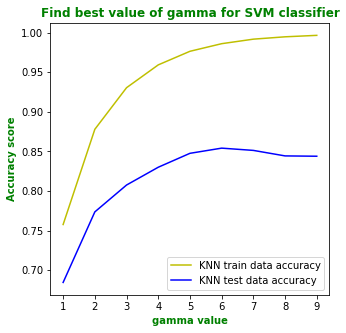

In [37]:
train_svm_accuracy = list()
test_svm_accuracy = list()

for i in range(1, 10):
    temp_SVM = SVC(kernel='rbf', C=2, gamma=i, decision_function_shape='ovo', random_state=42)
    temp_SVM.fit(trainData, trainLabels)
    train_svm_accuracy.append(temp_SVM.score(trainData, trainLabels))
    test_svm_accuracy.append(temp_SVM.score(testData, testLabels))
    
plt.figure(figsize = (5, 5)) 
plt.plot([int(i) for i in range(1, 10)], train_svm_accuracy, color="y", label="KNN train data accuracy")
plt.plot([int(i) for i in range(1, 10)], test_svm_accuracy, color="b", label="KNN test data accuracy")

plt.title("Find best value of gamma for SVM classifier", color = 'green', fontweight = 'bold') 
plt.xlabel("gamma value", color = 'green', fontweight = 'bold') 
plt.ylabel("Accuracy score", color = 'green', fontweight = 'bold')

plt.legend(loc="best")
plt.show()

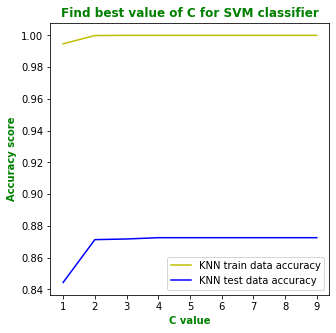

In [61]:
train_svm_accuracy = list()
test_svm_accuracy = list()

for i in range(1, 10):
    temp_SVM = SVC(kernel='rbf', C=i, gamma=8, decision_function_shape='ovo', random_state=42)
    temp_SVM.fit(trainData, trainLabels)
    train_svm_accuracy.append(temp_SVM.score(trainData, trainLabels))
    test_svm_accuracy.append(temp_SVM.score(testData, testLabels))
    
plt.figure(figsize = (5, 5)) 
plt.plot([int(i) for i in range(1, 10)], train_svm_accuracy, color="y", label="KNN train data accuracy")
plt.plot([int(i) for i in range(1, 10)], test_svm_accuracy, color="b", label="KNN test data accuracy")

plt.title("Find best value of C for SVM classifier", color = 'green', fontweight = 'bold') 
plt.xlabel("C value", color = 'green', fontweight = 'bold') 
plt.ylabel("Accuracy score", color = 'green', fontweight = 'bold')

plt.legend(loc="best")
plt.show()

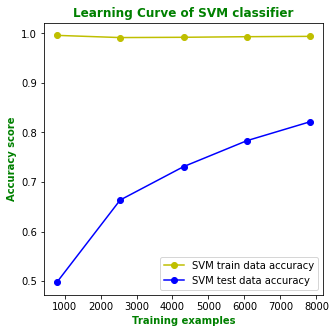

In [38]:
svm_train_sizes, svm_train_accuracy, svm_testt_accuracy = learning_curve(svm, trainData, trainLabels, scoring="accuracy")

plt.figure(figsize = (5, 5)) 
plt.plot(svm_train_sizes, svm_train_accuracy.mean(1), "o-", color="y", label="SVM train data accuracy")
plt.plot(svm_train_sizes, svm_testt_accuracy.mean(1), "o-", color="b", label="SVM test data accuracy")

plt.title("Learning Curve of SVM classifier", color = 'green', fontweight = 'bold') 
plt.xlabel("Training examples", color = 'green', fontweight = 'bold') 
plt.ylabel("Accuracy score", color = 'green', fontweight = 'bold')


plt.legend(loc="best")
plt.show()

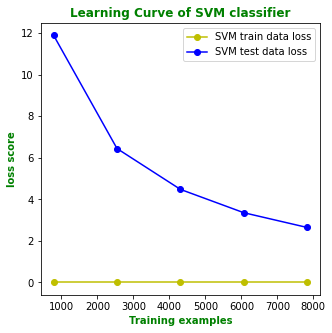

In [39]:
svm_train_sizes, svm_train_loss, svm_test_loss = learning_curve(KNN, trainData, trainLabels, scoring="neg_log_loss")

plt.figure(figsize = (5, 5)) 
plt.plot(svm_train_sizes, -svm_train_loss.mean(1), "o-", color="y", label="SVM train data loss")
plt.plot(svm_train_sizes, -svm_test_loss.mean(1), "o-", color="b", label="SVM test data loss")

plt.title("Learning Curve of SVM classifier", color = 'green', fontweight = 'bold') 
plt.xlabel("Training examples", color = 'green', fontweight = 'bold') 
plt.ylabel("loss score", color = 'green', fontweight = 'bold')

plt.legend(loc="best")
plt.show()

## MLP classifier

In [40]:
MLP = MLPClassifier(hidden_layer_sizes = (128, 64, 32, 8), batch_size = 32, solver = 'sgd', random_state=4, \
                      verbose=False, momentum=0.85, max_iter=350, learning_rate_init = 0.01, n_iter_no_change=100)
MLP.fit(trainData, trainLabels)

MLPClassifier(batch_size=32, hidden_layer_sizes=(128, 64, 32, 8),
              learning_rate_init=0.01, max_iter=350, momentum=0.85,
              n_iter_no_change=100, random_state=4, solver='sgd')

In [41]:
print("MLP Classifier Train accuracy: ", MLP.score(trainData, trainLabels)*100)
print("MLP Classifier Test accuracy: ", MLP.score(testData, testLabels)*100)

MLP Classifier Train accuracy:  99.97957516339869
MLP Classifier Test accuracy:  80.6781045751634


In [42]:
print("MLP classification report: \n")
print_report(MLP)

MLP classification report: 

TrainData: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       1.00      1.00      1.00      1849
           2       1.00      1.00      1.00      2077
           3       1.00      1.00      1.00      2104
           4       1.00      1.00      1.00      1777

    accuracy                           1.00      9792
   macro avg       1.00      1.00      1.00      9792
weighted avg       1.00      1.00      1.00      9792


TestData: 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       512
           1       0.85      0.79      0.82       472
           2       0.78      0.81      0.80       529
           3       0.80      0.78      0.79       521
           4       0.76      0.80      0.78       414

    accuracy                           0.81      2448
   macro avg       0.81      0.81      0.81      2448
weighted avg       0.81 

MLP Classifier: ROC curve of train


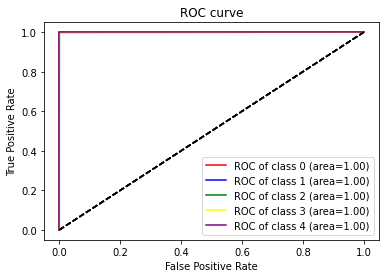

In [43]:
print("MLP Classifier: ROC curve of train")
visualize_roc_curve(MLP, trainData, trainLabels, n_classes=5)

MLP Classifier: ROC curve of test


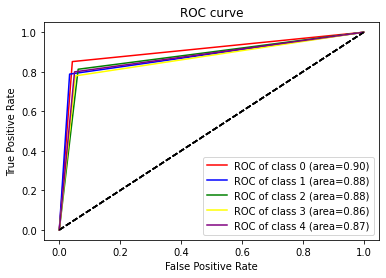

In [44]:
print("MLP Classifier: ROC curve of test")
visualize_roc_curve(MLP, testData, testLabels, n_classes=5)

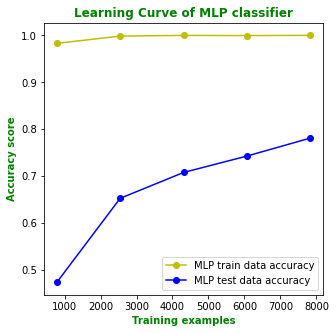

In [45]:
mlp_train_sizes, mlp_train_accuracy, mlp_test_accuracy = learning_curve(MLP, trainData, trainLabels, scoring="accuracy")

plt.figure(figsize = (5, 5)) 

plt.plot(mlp_train_sizes, mlp_train_accuracy.mean(1), "o-", color="y", label="MLP train data accuracy")
plt.plot(mlp_train_sizes, mlp_test_accuracy.mean(1), "o-", color="b", label="MLP test data accuracy")

plt.title("Learning Curve of MLP classifier", color = 'green', fontweight = 'bold') 
plt.xlabel("Training examples", color = 'green', fontweight = 'bold') 
plt.ylabel("Accuracy score", color = 'green', fontweight = 'bold') 

plt.legend(loc="best")
plt.show()

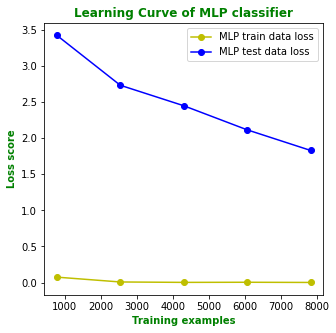

In [46]:
mlp_train_sizes, mlp_train_loss, mlp_test_loss = learning_curve(MLP, trainData, trainLabels, scoring="neg_log_loss")

plt.figure(figsize = (5, 5)) 
plt.plot(mlp_train_sizes, -mlp_train_loss.mean(1), "o-", color="y", label="MLP train data loss")
plt.plot(mlp_train_sizes, -mlp_test_loss.mean(1), "o-", color="b", label="MLP test data loss")

plt.title("Learning Curve of MLP classifier", color = 'green', fontweight = 'bold') 
plt.xlabel("Training examples", color = 'green', fontweight = 'bold') 
plt.ylabel("Loss score", color = 'green', fontweight = 'bold') 

plt.legend(loc="best")
plt.show()

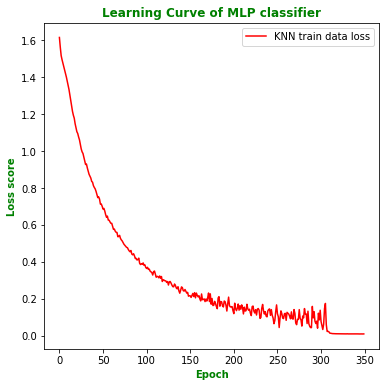

In [58]:
plt.figure(figsize = (6, 6)) 

plt.plot(MLP.loss_curve_, color="r", label="KNN train data loss")

plt.title("Learning Curve of MLP classifier", color = 'green', fontweight = 'bold') 
plt.xlabel("Epoch", color = 'green', fontweight = 'bold') 
plt.ylabel("Loss score", color = 'green', fontweight = 'bold') 

plt.legend(loc="best")
plt.show()

# Clustering

In [26]:
def visualize_clustring_result(model, feature1, feature2, data_in, text1, text2):
    print(text1, "\n")
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(feature1, feature2, c=model.fit_predict(data_in), cmap ='rainbow')
    plt.show()
    
    print()
    print(text2, "\n")
    fig = plt.figure(figsize=(6, 6))
    Axes3D(fig).scatter(feature1, feature2, zs=0, c=model.fit_predict(data_in),  cmap ='rainbow')
    plt.show()

## K Means cluster

In [49]:
def run_KMeans_cluster(k=5):
    print("For clusster number: ", k)
    print()
    kMeans = KMeans(n_clusters=k, init='k-means++', random_state=2, algorithm='elkan', max_iter=100)
    kMeans.fit(trainData_principal_2, trainLabels)
    print("kMeans train accuracy score: ", accuracy_score(np.array(trainLabels), kMeans.predict(trainData_principal_2))*100)
    print("kMeans train silhouette score: ", silhouette_score(trainData_principal_2, kMeans.predict(trainData_principal_2), random_state=2)*100)
    print("kMeans test accuracy score: ", accuracy_score(np.array(testLabels), kMeans.predict(testData_principal_2))*100)
    print("kMeans test silhouette score: ", silhouette_score(testData_principal_2, kMeans.predict(testData_principal_2), random_state=2)*100)
    print()
    text1 = "kMeans Cluster: result of train in 2D"
    text2 = "kMeans Cluster: result of train in 3D"
    visualize_clustring_result(kMeans, trainData_principal_2['P1'], trainData_principal_2['P2'], trainData, text1, text2)
    text1 = "kMeans Cluster: result of test in 2D"
    text2 = "kMeans Cluster: result of test in 3D"
    visualize_clustring_result(kMeans, testData_principal_2['P1'], testData_principal_2['P2'], testData, text1, text2)

For clusster number:  2

kMeans train accuracy score:  19.904003267973856
kMeans train silhouette score:  56.08980633583279
kMeans test accuracy score:  20.465686274509803
kMeans test silhouette score:  56.245800451094865

kMeans Cluster: result of train in 2D 



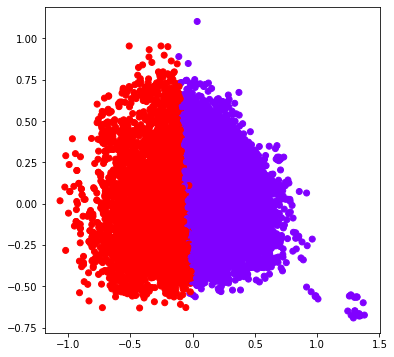


kMeans Cluster: result of train in 3D 



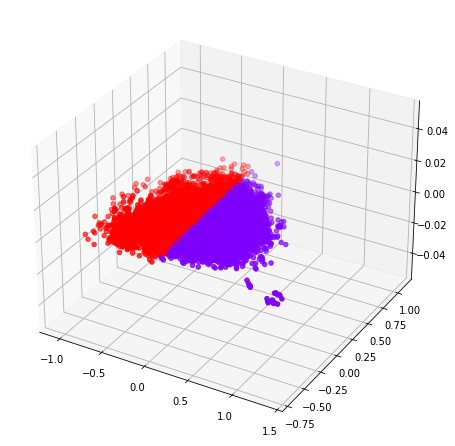

kMeans Cluster: result of test in 2D 



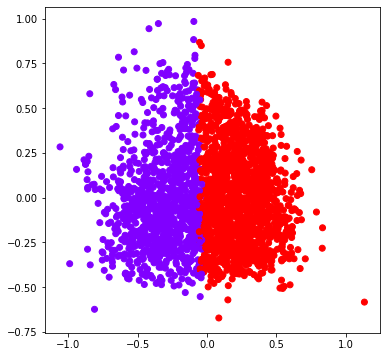


kMeans Cluster: result of test in 3D 



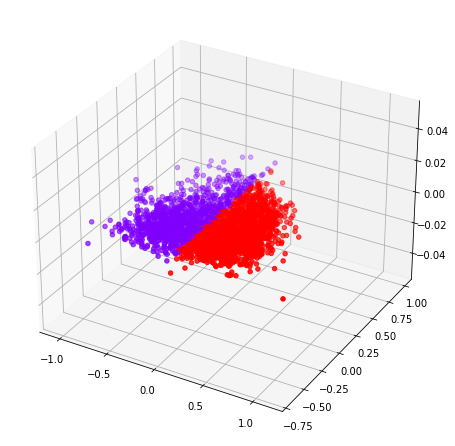

For clusster number:  3

kMeans train accuracy score:  20.567810457516337
kMeans train silhouette score:  47.56765320629847
kMeans test accuracy score:  20.179738562091504
kMeans test silhouette score:  47.843915962551726

kMeans Cluster: result of train in 2D 



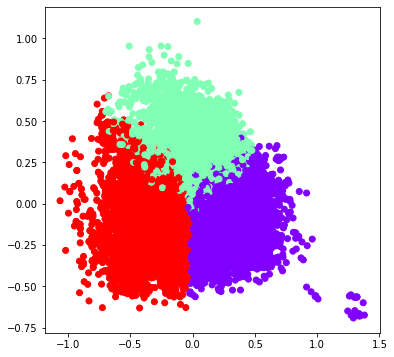


kMeans Cluster: result of train in 3D 



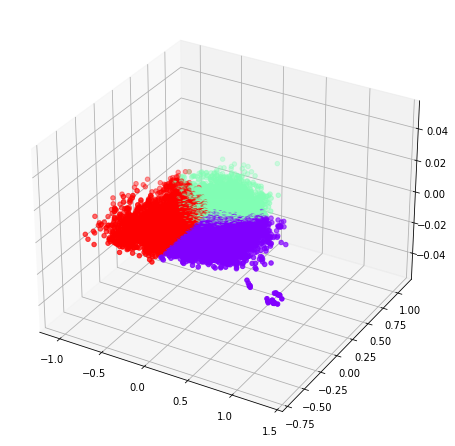

kMeans Cluster: result of test in 2D 



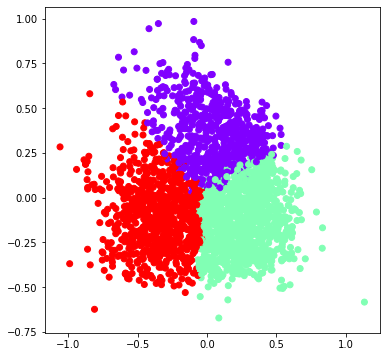


kMeans Cluster: result of test in 3D 



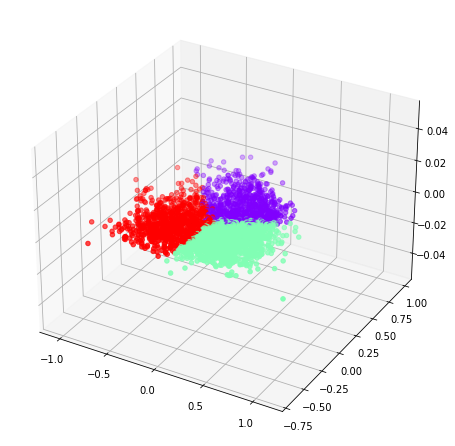

For clusster number:  4

kMeans train accuracy score:  19.985702614379086
kMeans train silhouette score:  49.38724823671695
kMeans test accuracy score:  20.547385620915033
kMeans test silhouette score:  49.80377961166413

kMeans Cluster: result of train in 2D 



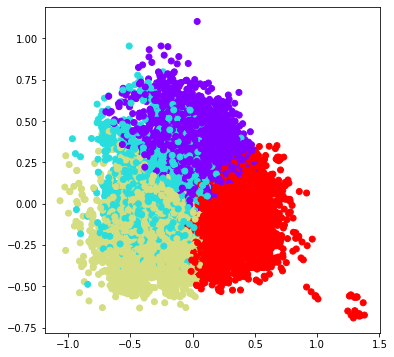


kMeans Cluster: result of train in 3D 



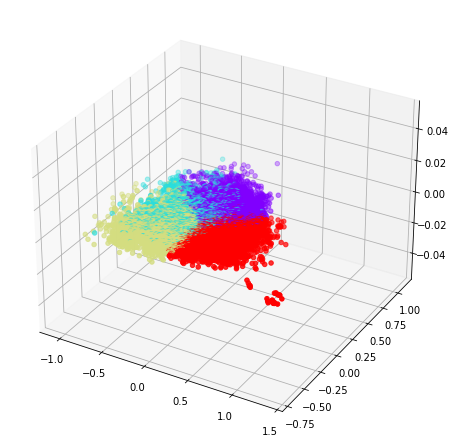

kMeans Cluster: result of test in 2D 



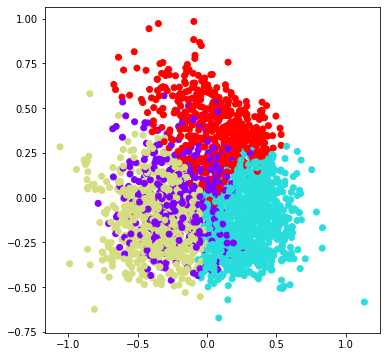


kMeans Cluster: result of test in 3D 



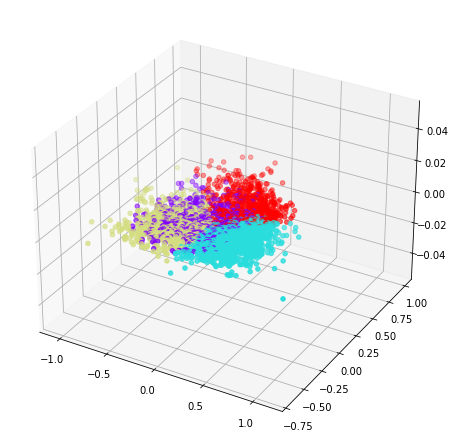

For clusster number:  5

kMeans train accuracy score:  20.96609477124183
kMeans train silhouette score:  53.37339042676123
kMeans test accuracy score:  22.344771241830067
kMeans test silhouette score:  53.79870289337694

kMeans Cluster: result of train in 2D 



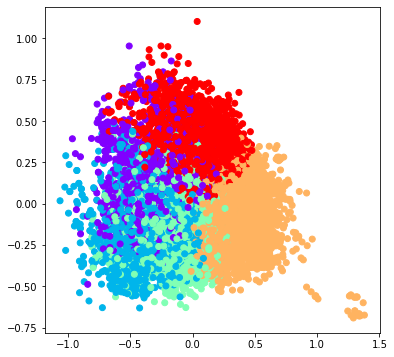


kMeans Cluster: result of train in 3D 



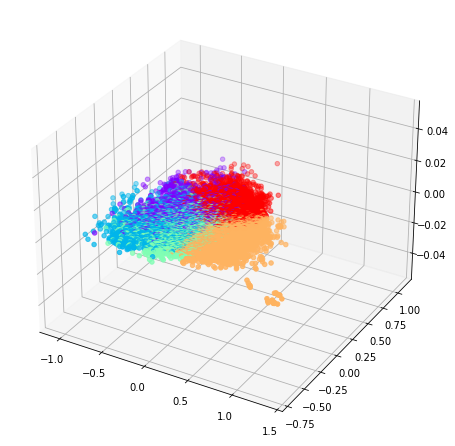

kMeans Cluster: result of test in 2D 



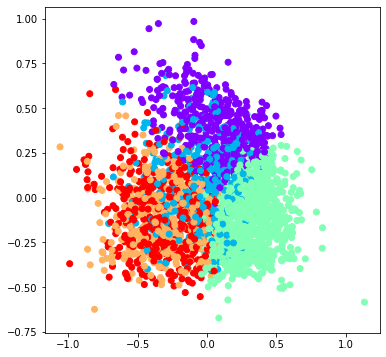


kMeans Cluster: result of test in 3D 



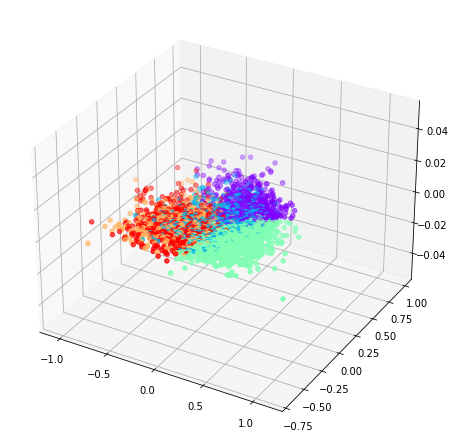

In [50]:
for i in range(2, 6):
    run_KMeans_cluster(i)

## DBSCAN cluster

In [53]:
dbscan = DBSCAN(eps=0.8, min_samples=3, metric='manhattan', n_jobs=2)
dbscan.fit(trainData_principal_2, trainLabels)

DBSCAN(eps=0.8, metric='manhattan', min_samples=3, n_jobs=2)

In [57]:
print("DBSCAN train accuracy score: ", accuracy_score(np.array(trainLabels), dbscan.fit_predict(trainData_principal_2))*100)
print("DBSCAN train silhouette score: ", silhouette_score(trainData_principal_2, dbscan.fit_predict(trainData_principal_2), random_state=2)*100)

DBSCAN train accuracy score:  20.26143790849673
DBSCAN train silhouette score:  53.37338778709126


In [53]:
print("DBSCAN test accuracy score: ", accuracy_score(np.array(testLabels), dbscan.fit_predict(testData_principal_2))*100)
print("DBSCAN test silhouette score: ", silhouette_score(testData_principal_2, dbscan.fit_predict(testData_principal_2), random_state=2)*100)

DBSCAN test accuracy score:  21.07843137254902
DBSCAN test silhouette score:  53.79870289337694


DBSCAN Cluster: result of train in 2D 



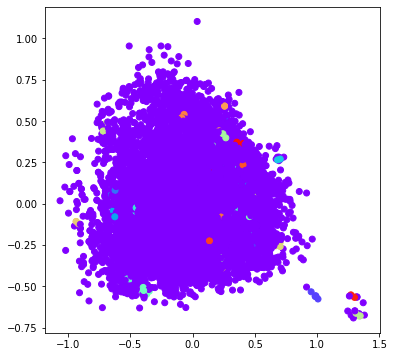


DBSCAN Cluster: result of train in 3D 



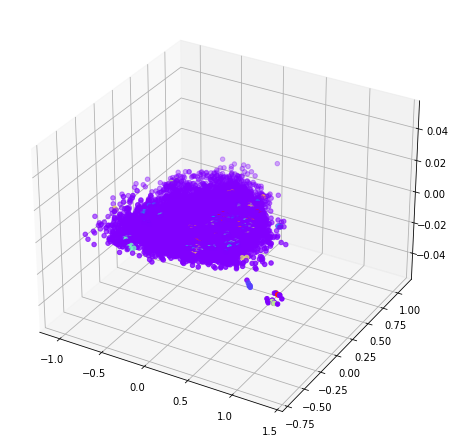

In [54]:
text1 = "DBSCAN Cluster: result of train in 2D"
text2 = "DBSCAN Cluster: result of train in 3D"

visualize_clustring_result(dbscan, trainData_principal_2['P1'], trainData_principal_2['P2'], trainData, text1, text2)

DBSCAN Cluster: result of test in 2D 



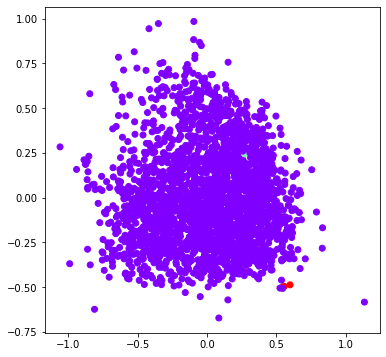


DBSCAN Cluster: result of test in 3D 



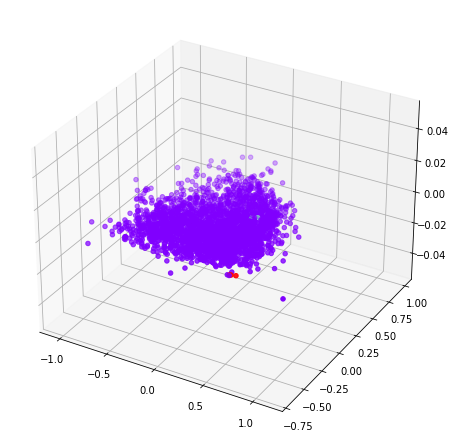

In [55]:
text1 = "DBSCAN Cluster: result of test in 2D"
text2 = "DBSCAN Cluster: result of test in 3D"

visualize_clustring_result(dbscan, testData_principal_2['P1'], testData_principal_2['P2'], testData, text1, text2)

## K medoids cluster

In [56]:
def run_kMedoids_cluster(k=5):
    print("For clusster number: ", k)
    print()
    kMedoids = KMedoids(n_clusters=k, init='k-medoids++', random_state=2, method='pam', max_iter=100)
    kMedoids.fit(trainData_principal_2, trainLabels)
    print("kMedoids train accuracy score: ", accuracy_score(np.array(trainLabels), kMedoids.predict(trainData_principal_2))*100)
    print("kMedoids train silhouette score: ", silhouette_score(trainData_principal_2, kMedoids.predict(trainData_principal_2), random_state=2)*100)
    print("kMedoids test accuracy score: ", accuracy_score(np.array(testLabels), kMedoids.predict(testData_principal_2))*100)
    print("kMedoids test silhouette score: ", silhouette_score(testData_principal_2, kMedoids.predict(testData_principal_2), random_state=2)*100)
    print()
    text1 = "kMedoids Cluster: result of train in 2D"
    text2 = "kMedoids Cluster: result of train in 3D"
    visualize_clustring_result(kMedoids, trainData_principal_2['P1'], trainData_principal_2['P2'], trainData, text1, text2)
    text1 = "kMedoids Cluster: result of test in 2D"
    text2 = "kMedoids Cluster: result of test in 3D"
    visualize_clustring_result(kMedoids, testData_principal_2['P1'], testData_principal_2['P2'], testData, text1, text2)

    

For clusster number:  2

kMedoids train accuracy score:  19.904003267973856
kMedoids train silhouette score:  56.08980633583279
kMedoids test accuracy score:  20.465686274509803
kMedoids test silhouette score:  56.245800451094865

kMedoids Cluster: result of train in 2D 



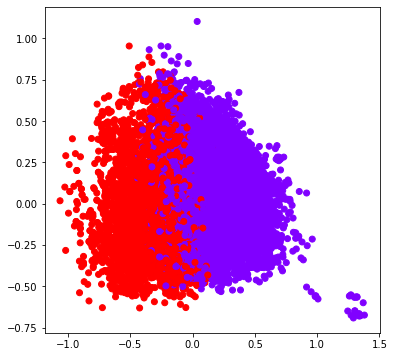


kMedoids Cluster: result of train in 3D 



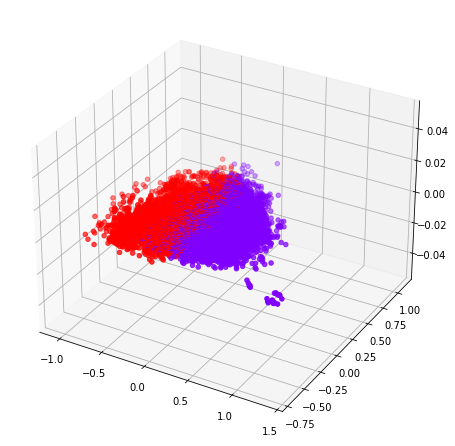

kMedoids Cluster: result of test in 2D 



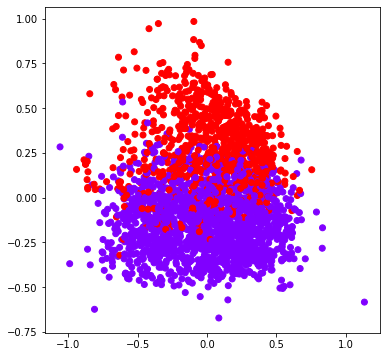


kMedoids Cluster: result of test in 3D 



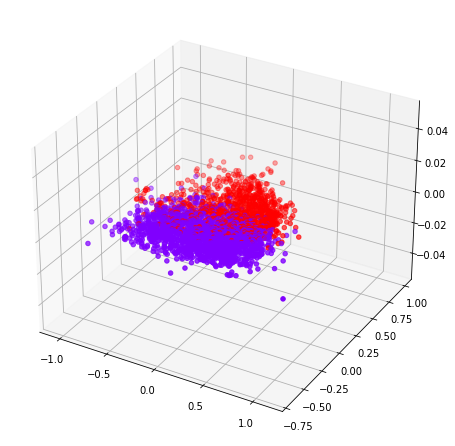

For clusster number:  3

kMedoids train accuracy score:  20.567810457516337
kMedoids train silhouette score:  45.5947139975777
kMedoids test accuracy score:  20.79248366013072
kMedoids test silhouette score:  45.57884509722503

kMedoids Cluster: result of train in 2D 



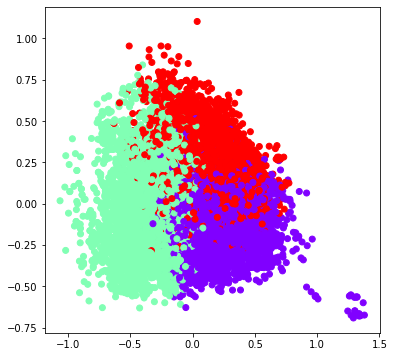


kMedoids Cluster: result of train in 3D 



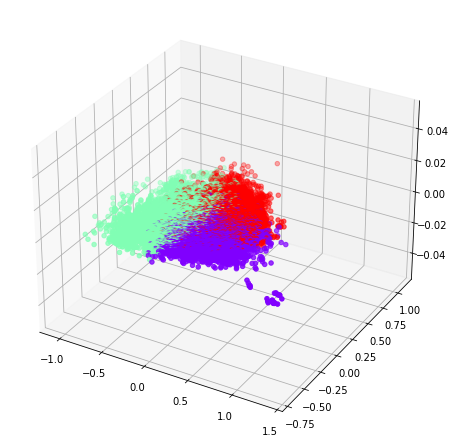

kMedoids Cluster: result of test in 2D 



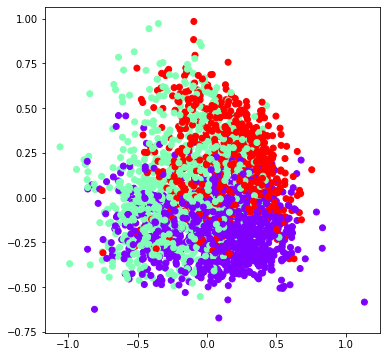


kMedoids Cluster: result of test in 3D 



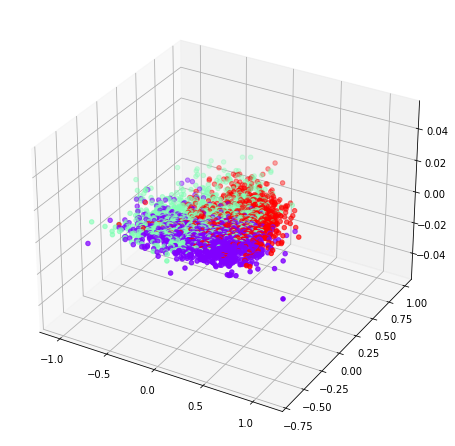

For clusster number:  4

kMedoids train accuracy score:  19.730392156862745
kMedoids train silhouette score:  48.96910171371724
kMedoids test accuracy score:  19.444444444444446
kMedoids test silhouette score:  49.37024168807112

kMedoids Cluster: result of train in 2D 



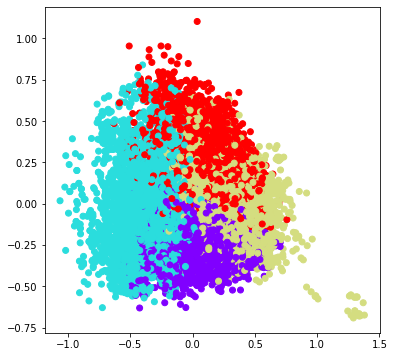


kMedoids Cluster: result of train in 3D 



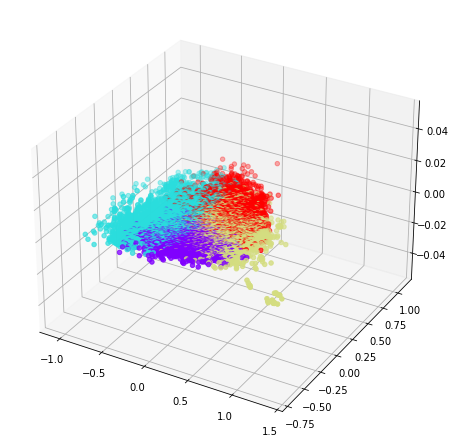

kMedoids Cluster: result of test in 2D 



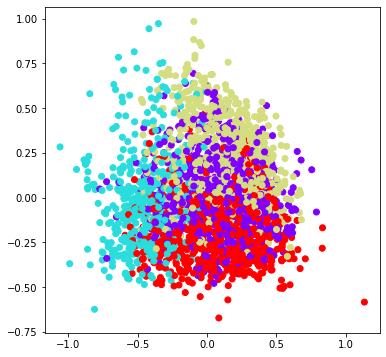


kMedoids Cluster: result of test in 3D 



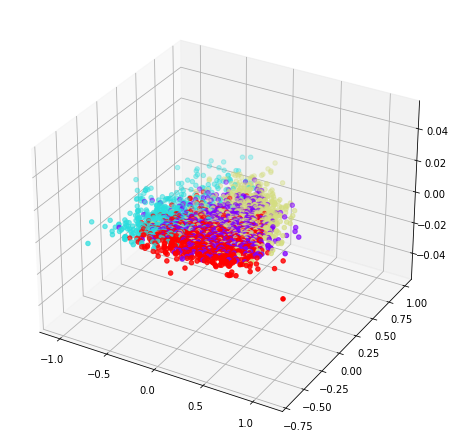

For clusster number:  5

kMedoids train accuracy score:  19.679330065359476
kMedoids train silhouette score:  53.37339042676123
kMedoids test accuracy score:  19.730392156862745
kMedoids test silhouette score:  53.79870289337694

kMedoids Cluster: result of train in 2D 



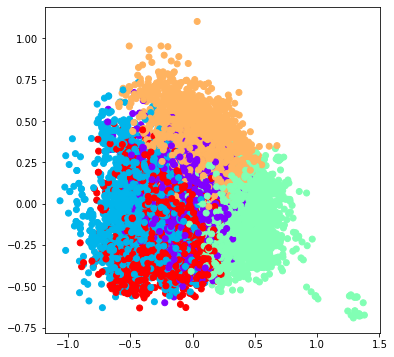


kMedoids Cluster: result of train in 3D 



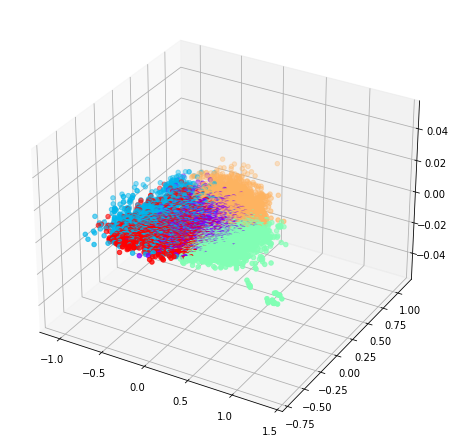

kMedoids Cluster: result of test in 2D 



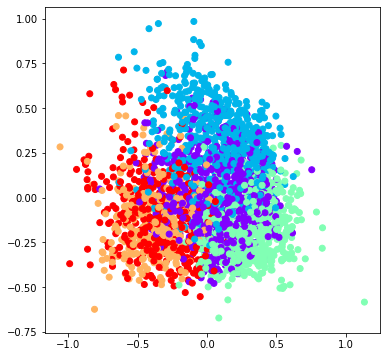


kMedoids Cluster: result of test in 3D 



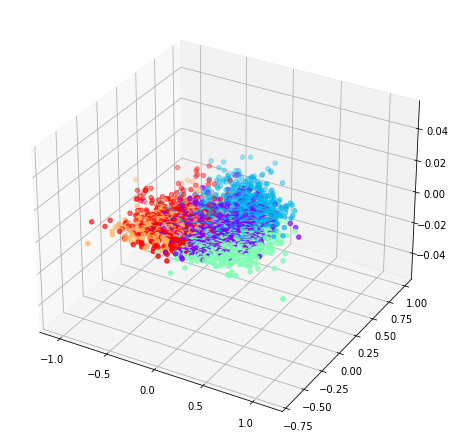

In [57]:
for i in range(2, 6):
    run_kMedoids_cluster(i)